In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

In [2]:
np.random.seed(42)

A = np.array([
    [1, 2.0],
    [1, 3.0],
    [1, 4.5],
    [1, 5.5]
])

y = np.array([
    [3.1],
    [4.9],
    [8.2],
    [10.1]
])

m = len(y)

In [3]:
ATA = A.T @ A
ATA_inv = np.linalg.inv(ATA)
ATy = A.T @ y
theta_normal = ATA_inv @ ATy

theta_normal

array([[-1.04137931],
       [ 2.03103448]])

In [4]:
learning_rate = 0.01
n_iterations = 1000

theta_bgd = np.zeros((A.shape[1], 1))

for iteration in range(n_iterations):
    predictions = A @ theta_bgd
    errors = predictions - y
    gradient = (1/m) * (A.T @ errors)
    
    theta_bgd = theta_bgd - learning_rate * gradient

theta_bgd

array([[-0.55217831],
       [ 1.9146829 ]])

In [5]:
U, S, Vt = np.linalg.svd(A, full_matrices=False)

S_inv = np.diag(1/S)
A_pseudo_inv = Vt.T @ S_inv @ U.T

theta_svd = A_pseudo_inv @ y

theta_svd

array([[-1.04137931],
       [ 2.03103448]])

In [6]:
noise = np.random.rand(m, 1) * 0.0001
A_collinear = np.hstack((A, A[:, [1]] + noise))

print(f"A_collinear shape: {A_collinear.shape}")
print(f"Condition number of A: {np.linalg.cond(A):.2f}")
print(f"Condition number of A_collinear: {np.linalg.cond(A_collinear):.2e}")

A_collinear shape: (4, 3)
Condition number of A: 12.45
Condition number of A_collinear: 3.95e+05


In [7]:
ATA_col = A_collinear.T @ A_collinear
ATA_col_inv = np.linalg.inv(ATA_col)
ATy_col = A_collinear.T @ y
theta_normal_col = ATA_col_inv @ ATy_col
    
theta_normal_col

array([[-8.53794593e-01],
       [ 3.43827452e+03],
       [-3.43623267e+03]])

In [8]:
U_col, S_col, Vt_col = np.linalg.svd(A_collinear, full_matrices=False)
S_col_inv = np.diag(1/S_col)
A_pseudo_inv_col = Vt_col.T @ S_col_inv @ U_col.T
theta_svd_col = A_pseudo_inv_col @ y

print(f"θ = \n{theta_svd_col}")
print(f"Singular values: {S_col}")

θ = 
[[-8.53775599e-01]
 [ 3.43826298e+03]
 [-3.43622113e+03]]
Singular values: [1.14261887e+01 6.66520157e-01 2.89571727e-05]


In [9]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'

column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower',
                'Weight', 'Acceleration', 'ModelYear', 'Origin',
                'CarName']

data_mpg = pd.read_csv(url, names=column_names,
                       na_values='?', delim_whitespace=True)

data_mpg = data_mpg.dropna(subset=['Horsepower'])
data_mpg['Horsepower'] = data_mpg['Horsepower'].astype(float)

data_mpg.shape

C:\Users\Admin\AppData\Local\Temp\ipykernel_6964\973480580.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_mpg = pd.read_csv(url, names=column_names,


(392, 9)

In [10]:
data_mpg.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,ModelYear,Origin,CarName
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [11]:
data_mpg[['MPG', 'Horsepower']].describe()

,MPG,Horsepower
count,392.000000,392.000000
mean,23.445918,104.469388
std,7.805007,38.491160
min,9.000000,46.000000
25%,17.000000,75.000000
50%,22.750000,93.500000
75%,29.000000,126.000000
max,46.600000,230.000000


In [12]:
X_hp = data_mpg['Horsepower'].values.reshape(-1, 1)
y_mpg = data_mpg['MPG'].values.reshape(-1, 1)

A_mpg = np.hstack([np.ones((X_hp.shape[0], 1)), X_hp])

In [13]:
mean_hp = np.mean(A_mpg[:, 1])
std_hp = np.std(A_mpg[:, 1])

A_mpg_normalized = A_mpg.copy()
A_mpg_normalized[:, 1] = (A_mpg[:, 1] - mean_hp) / std_hp

m_mpg = len(y_mpg)

In [14]:
learning_rate_sgd = 0.01
n_iterations_sgd = 5000

theta_sgd = np.zeros((A_mpg_normalized.shape[1], 1))

cost_history_sgd = []
start_time = time.time()

for iteration in range(n_iterations_sgd):
    i = np.random.randint(0, m_mpg)
    
    A_i = A_mpg_normalized[i:i+1, :]
    y_i = y_mpg[i:i+1, :]
    
    prediction_i = A_i @ theta_sgd
    error_i = prediction_i - y_i
    gradient_i = error_i * A_i.T

    theta_sgd = theta_sgd - learning_rate_sgd * gradient_i
    
    predictions_all = A_mpg_normalized @ theta_sgd
    errors_all = predictions_all - y_mpg
    cost = (1/(2*m_mpg)) * np.sum(errors_all**2)
    cost_history_sgd.append(cost)

sgd_time = time.time() - start_time

print(f"SGD completed in {sgd_time:.4f} seconds")
print(f"θ = \n{theta_sgd}")
print(f"Final cost: {cost_history_sgd[-1]:.4f}")

SGD completed in 0.0847 seconds
θ = 
[[22.5832758 ]
 [-6.51916008]]
Final cost: 12.4457


In [15]:
learning_rate_bgd = 0.01
n_iterations_bgd = 1000

theta_bgd_mpg = np.zeros((A_mpg_normalized.shape[1], 1))

cost_history_bgd = []
start_time = time.time()

for iteration in range(n_iterations_bgd):
    predictions = A_mpg_normalized @ theta_bgd_mpg
    errors = predictions - y_mpg
    
    gradient = (1/m_mpg) * (A_mpg_normalized.T @ errors)

    theta_bgd_mpg = theta_bgd_mpg - learning_rate_bgd * gradient

    cost = (1/(2*m_mpg)) * np.sum(errors**2)
    cost_history_bgd.append(cost)

bgd_time = time.time() - start_time

print(f"BGD completed in {bgd_time:.4f} seconds")
print(f"θ = \n{theta_bgd_mpg}")
print(f"Final cost: {cost_history_bgd[-1]:.4f}")

BGD completed in 0.0110 seconds
θ = 
[[23.44490618]
 [-6.06761045]]
Final cost: 11.9718


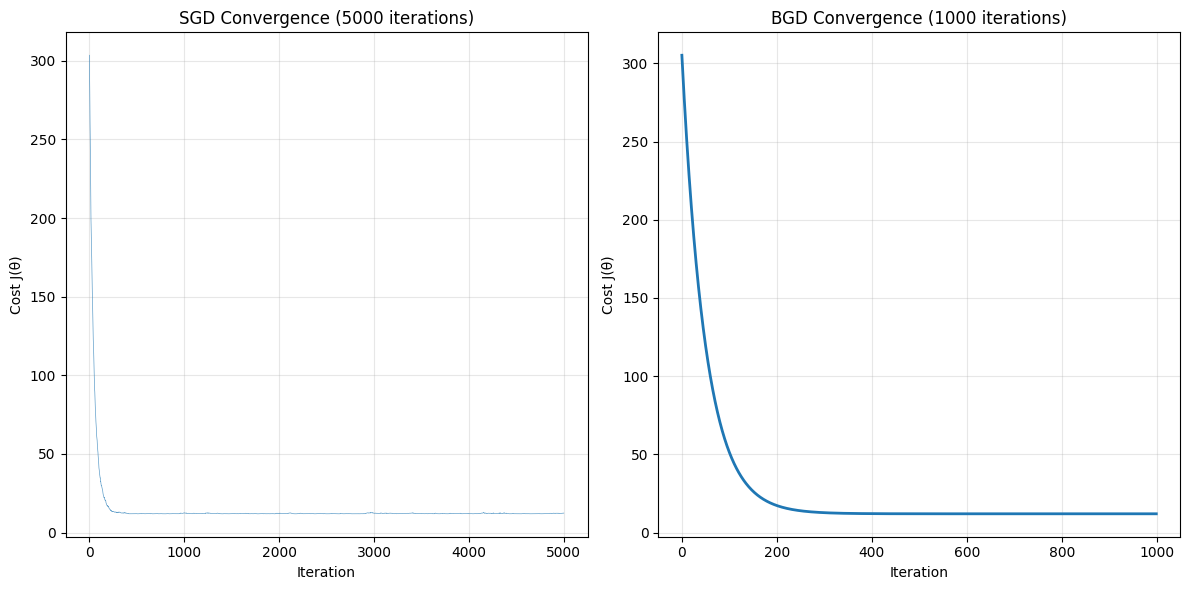

In [16]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(cost_history_sgd, alpha=0.7, linewidth=0.5)
plt.xlabel('Iteration')
plt.ylabel('Cost J(θ)')
plt.title('SGD Convergence (5000 iterations)')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(cost_history_bgd, linewidth=2)
plt.xlabel('Iteration')
plt.ylabel('Cost J(θ)')
plt.title('BGD Convergence (1000 iterations)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('convergence_comparison.png', dpi=150)

In [17]:
X_hp_original = data_mpg['Horsepower'].values.reshape(-1, 1)

A_poly = np.hstack([
    np.ones((X_hp_original.shape[0], 1)),
    X_hp_original,
    X_hp_original**2
])

In [18]:
A_poly_normalized = A_poly.copy()
mean_hp_poly = np.mean(A_poly[:, 1])
std_hp_poly = np.std(A_poly[:, 1])
mean_hp2 = np.mean(A_poly[:, 2])
std_hp2 = np.std(A_poly[:, 2])

A_poly_normalized[:, 1] = (A_poly[:, 1] - mean_hp_poly) / std_hp_poly
A_poly_normalized[:, 2] = (A_poly[:, 2] - mean_hp2) / std_hp2

In [19]:
learning_rate_poly = 0.01
n_iterations_poly = 5000

theta_poly = np.zeros((A_poly_normalized.shape[1], 1))
cost_history_poly = []

for iteration in range(n_iterations_poly):
    i = np.random.randint(0, m_mpg)
    
    A_i = A_poly_normalized[i:i+1, :]
    y_i = y_mpg[i:i+1, :]
    
    prediction_i = A_i @ theta_poly
    error_i = prediction_i - y_i
    gradient_i = error_i * A_i.T
    
    theta_poly = theta_poly - learning_rate_poly * gradient_i
    
    if iteration % 100 == 0:
        predictions_all = A_poly_normalized @ theta_poly
        errors_all = predictions_all - y_mpg
        cost = (1/(2*m_mpg)) * np.sum(errors_all**2)
        cost_history_poly.append(cost)

print(f"\nPolynomial Regression Result:")
print(f"θ = \n{theta_poly}")
print(f"Final cost: {cost_history_poly[-1]:.4f}")


Polynomial Regression Result:
θ = 
[[ 23.58374317]
 [-11.55644909]
 [  5.95990338]]
Final cost: 10.2314


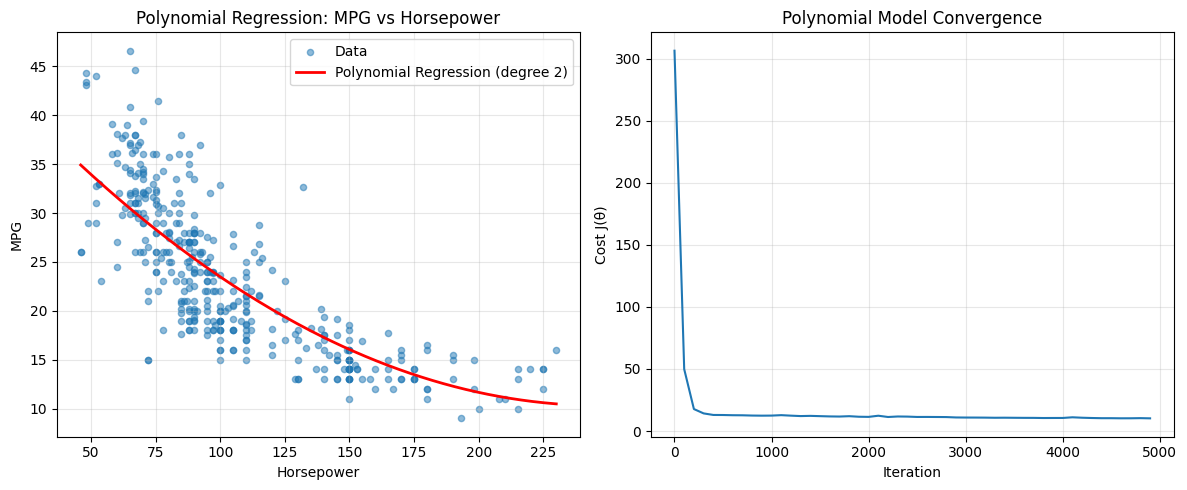

In [20]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_hp_original, y_mpg, alpha=0.5, s=20, label='Data')

hp_range = np.linspace(X_hp_original.min(), X_hp_original.max(), 300).reshape(-1, 1)
hp_range_poly = np.hstack([
    np.ones((hp_range.shape[0], 1)),
    hp_range,
    hp_range**2
])

hp_range_poly_norm = hp_range_poly.copy()
hp_range_poly_norm[:, 1] = (hp_range_poly[:, 1] - mean_hp_poly) / std_hp_poly
hp_range_poly_norm[:, 2] = (hp_range_poly[:, 2] - mean_hp2) / std_hp2

predictions_curve = hp_range_poly_norm @ theta_poly

plt.plot(hp_range, predictions_curve, 'r-', linewidth=2, label='Polynomial Regression (degree 2)')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('Polynomial Regression: MPG vs Horsepower')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(np.arange(len(cost_history_poly)) * 100, cost_history_poly)
plt.xlabel('Iteration')
plt.ylabel('Cost J(θ)')
plt.title('Polynomial Model Convergence')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('polynomial_regression.png', dpi=150)